In [97]:
from struct import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load in HR file

In [87]:
with open('SA90200025134082_20150831094353_2712_HR.vital', 'rb') as f:
    full = f.read()
    fmt = "16s8s8s4siiiiid"
    data_len = (len(full) - calcsize(fmt))/8
    fmt = fmt + str(data_len) + "d"
    full_data = unpack(fmt,full)
    name, uom, unit, bed, year, month, day, hour, minute, second, data = full_data[0], \
                                                                    full_data[1], \
                                                                    full_data[2],\
                                                                    full_data[3],\
                                                                    full_data[4],\
                                                                    full_data[5],\
                                                                    full_data[6],\
                                                                    full_data[7],\
                                                                    full_data[8],\
                                                                    full_data[9],\
                                                                    full_data[10:]
    del full_data
#     print data
    f.close()
    data = np.reshape(list(data), (4, len(data)/4), order = 'F')
    vital_val = data[0, :]
    vital_offset = data[1,:]
    vital_limitLo = data[2,:]
    vital_limitHi = data[3,:]

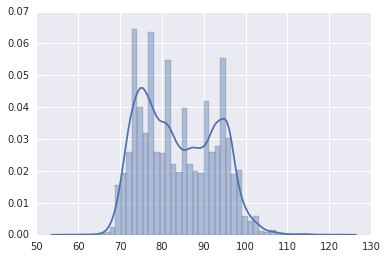

In [98]:
##Dist of HR
sns.distplot(vital_val)

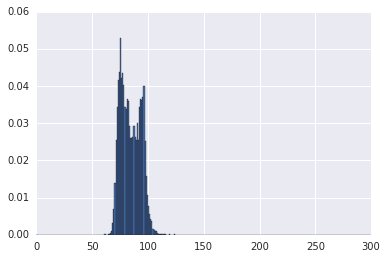

In [174]:
prob, bins, patches = plt.hist(vital_val, 
                               bins = 300, 
                               range = (0, 300),
                                normed = True, 
                               stacked = True)

#### Random distribution of heart rates

In [240]:
from numpy import random
vital_val_rand = random.randint(120, 139, 4000)

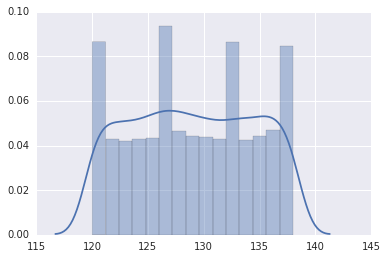

In [241]:
sns.distplot(vital_val_rand)

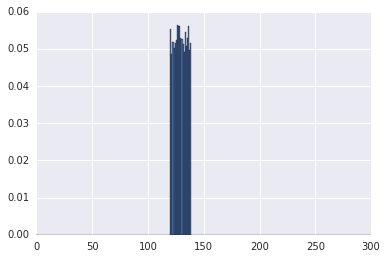

In [243]:
prob_rand, bins_rand, patches_rand = plt.hist(vital_val_rand, 
                                     bins = 300, 
                                     range = (0, 300),
                                     normed = True, stacked = True)

#### Shift vitals

In [ ]:
vitals_val_shift = vital_val + 5

In [ ]:
sns.distplot(vital_val_shift)

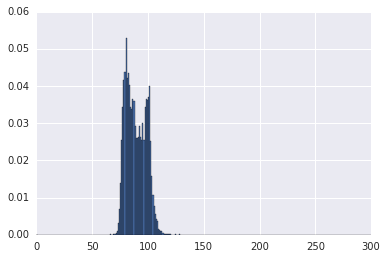

In [245]:
prob_shift, bins_shift, patches_shift = plt.hist(vitals_val_shift, 
                                     bins = 300, 
                                     range = (0, 300),
                                     normed = True, stacked = True)

NameError: name 'prob_rand' is not defined

### Average Distribution

In [247]:
prob_AVG = (prob_rand + prob + prob_shift)/3

<Container object of 300 artists>

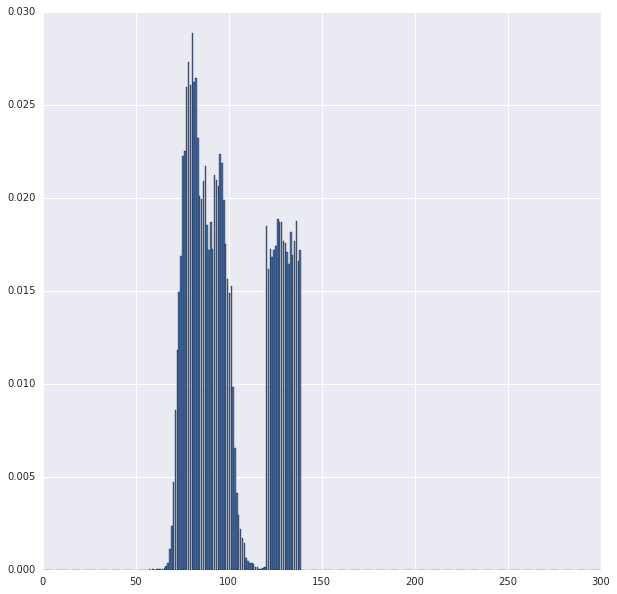

In [250]:
plt.figure(figsize = (10,10))
plt.bar(range(0,300), prob_AVG)

In [254]:
# total = np.append(vital_val, vitals_val_shift)
# total = np.append(total, vital_val_new)

In [255]:
# prob_avg, bins_avg, patches_avg = plt.hist(total, 
#                                      bins = 300, 
#                                      range = (0, 300),
#                                      normed = True, stacked = True)

### Sample Entropies

In [237]:
from scipy import stats

In [251]:
## ORIGINAL with P avg of shifted + orig + random
stats.entropy(prob, prob_AVG)

0.48179440201769408

In [252]:
## SHIFTED with P avg of shifted + orig + random 
stats.entropy(prob_shift, prob_AVG)

0.49753317236102867

In [253]:
## RANDOM with P avg of shifted + orig + random 
stats.entropy(prob_rand, prob_AVG)

1.0977470474956457